<a href="https://colab.research.google.com/github/dhanushkaputty/ML/blob/main/MLAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a)** Load the dataset Diabetes read the csv file


In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')


In [ ]:
df.shape

(768, 9)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
df_clean = df.copy()

In [ ]:
for col in cols_with_zero:
   median_val = df_clean.loc[df_clean[col] != 0, col].median()
   df_clean[col] = df_clean[col].replace(0, median_val)
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


separate features and target

In [ ]:
y = df_clean['Outcome'].values

In [ ]:
x = df_clean.drop('Outcome',axis = 1).values

In [ ]:
print(" y shape:", y.shape)


 y shape: (768,)


In [ ]:
print(" x shape:", x.shape)

 x shape: (768, 8)


**b**)Train and Test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0,stratify =y)

In [ ]:
print("Train samples:",x_train.shape[0])

Train samples: 614


In [ ]:
print("Test samples:",x_test.shape[0])

Test samples: 154


Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

**c**)
 Give the objective of logistic regression with L2  regularization .

Purpose of L2 Reularasation
Controls model complexity,
Improves generalization to unseen data,
Shrinks coefficients toward zero (but not exactly zero).
1.To avoid overfitting, an extra penalty is added to the loss function.

2.This penalty depends on the sum of the squares of the model’s  coefficients.

The loss function becomes:average log loss + penalty


The first part is the log-loss (cross-entropy), which measures prediction error.

The second part 2λ​∥w∥22​  is the L2 penalty, which discourages large weights to prevent overfitting


.





​


**(d)** Run logistic regression on the data using L2 regularization, varying the regularization parameter

λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data

and the testing data (averaged over all instances), as a function of λ (you should use a log scale

for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third

graph the actual values of the weights obtained (one curve per weight). Finally, plot on a

graph the accuracy on the training and test set. Explain briefly what you see.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,accuracy_score
import numpy as np
import matplotlib.pyplot as plt


setting the lambda values and intilazing the store list

In [ ]:

lambdas = [0,0.1,1,10,100]
C_values = [1/l if l!=0 else 1e6 for l in lambdas]
train_losses = []
test_losses = []
train_accs = []
test_accs =[]
weight_norms = []
weights_list =[]
l2_norms = []

Training the LogistricRegression with L2,prediction,cross entroy loss,Accuracy, stores result in line 18

In [ ]:
for C in C_values :
  model = LogisticRegression(penalty = 'l2',C=C,solver = 'lbfgs',max_iter = 1000)
  model.fit(x_train,y_train)

  y_train_pred_prob = model.predict_proba(x_train)[:,1]
  y_test_pred_prob = model.predict_proba(x_test)[:,1]


  train_loss = log_loss(y_train,y_train_pred_prob)
  test_loss = log_loss(y_test,y_test_pred_prob)

  train_accuracy = accuracy_score(y_train,model.predict(x_train))
  test_accuracy  = accuracy_score(y_test,model.predict(x_test))

  train_losses.append(train_loss)
  test_losses.append(test_loss)
  l2_norms.append(np.linalg.norm(model.coef_))
  weights_list.append(model.coef_.flatten())
  train_accs.append(train_accuracy)
  test_accs.append(test_accuracy)





In [ ]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

 1. Plotting Cross entropy loss vs λ

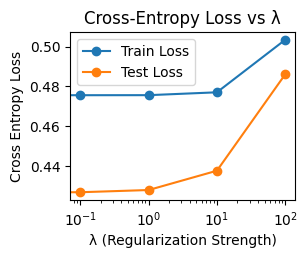

In [ ]:

plt.subplot(2,2,1)
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Cross Entropy Loss")
plt.title("Cross-Entropy Loss vs λ")
plt.legend()

 Plotting Weight norm vs λ

Text(0.5, 1.0, 'Weight Norm vs λ')

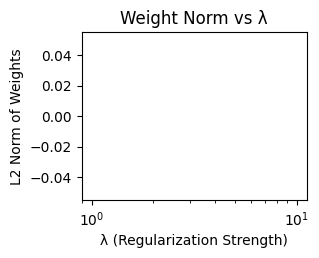

In [ ]:

plt.subplot(2,2,2)
plt.plot(lambdas[:len(weight_norms)], weight_norms, marker='o')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")


Plotting  Weight norm vs λ


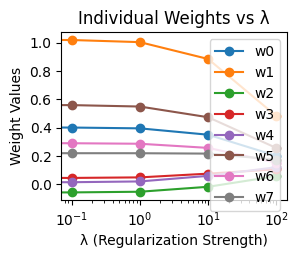

In [ ]:

plt.subplot(2,2,3)
weights_array = np.array(weights_list)
for i in range(weights_array.shape[1]):
    plt.plot(lambdas, weights_array[:,i], marker='o', label=f'w{i}')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Weight Values")
plt.title("Individual Weights vs λ")
plt.legend()

 Plotting  Accuracy vs λ

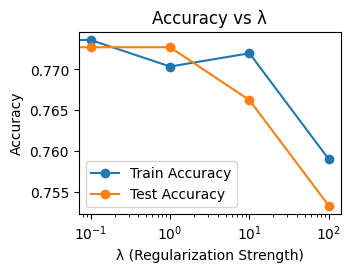

In [ ]:

plt.subplot(2,2,4)
plt.plot(lambdas, train_accs, marker='o', label='Train Accuracy')
plt.plot(lambdas,test_accs, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()

plt.tight_layout()
plt.show()

**(e)** Re-format the data in the following way: take each of the input variables, and feed it through

a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),

use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.

You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.


For each feature (except bias), generate 5 Gaussian basis functions with means evenly spaced in [-10, 10].

For each σ in [0.1, 0.5, 1, 5, 10], compute the transformed dataset.





Function to generate Gaussian basis expansion ,shape (n_samples, n_features*5) in line 13 we see add_bias term in 14 we see




In [ ]:



def gaussian_basis_transform(X, sigma):
    n_samples, n_features = X.shape
    means = np.linspace(-10, 10, 5)
    basis_list = []

    for j in range(n_features):
        for mu in means:
            basis_list.append(np.exp(-((X[:, j] - mu) ** 2) / (2 * sigma ** 2)))

    Phi = np.vstack(basis_list).T
    Phi = np.hstack([np.ones((n_samples, 1)), Phi])
    return Phi


sigmas = [0.1, 0.5, 1, 5, 10]
results = {}

for sigma in sigmas:
    X_train_trans = gaussian_basis_transform(x_train, sigma)
    X_test_trans  = gaussian_basis_transform(x_test, sigma)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_trans, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train_trans))
    test_acc  = accuracy_score(y_test, model.predict(X_test_trans))

    results[sigma] = (train_acc, test_acc)


for sigma, (train_acc, test_acc) in results.items():
    print(f"σ = {sigma}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")


σ = 0.1: Train Accuracy = 0.6531, Test Accuracy = 0.6364
σ = 0.5: Train Accuracy = 0.6726, Test Accuracy = 0.6753
σ = 1: Train Accuracy = 0.6824, Test Accuracy = 0.6883
σ = 5: Train Accuracy = 0.7671, Test Accuracy = 0.7662
σ = 10: Train Accuracy = 0.7671, Test Accuracy = 0.7662


**(f) **Using no regularization and doing regression with this new set of basis functions, plot the

training and testing error as a function of σ (when using only basis functions of a given σ). Add

constant lines showing the training and testing error you had obtained in part c. Explain how σ

influences overfitting and the bias-variance trade-off.  now f

From part (e), you already generated Gaussian basis features for different σ values (0.1, 0.5, 1, 5, 10).

For each σ, you fit linear regression without regularization.

Compute training and testing errors.

Plot training/testing error vs σ.

Add horizontal constant lines showing training/testing error from part (c) (without basis expansion, simple linear regression).

Then, explain effect of σ (too small → overfitting, too large → underfitting → bias-variance trade-off).

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
sigmas = [0.1, 0.5, 1, 5, 10]

train_errors = []
test_errors = []

In [ ]:

for sigma in sigmas:
  Phi_train = gaussian_basis_transform(x_train, sigma)
  Phi_test = gaussian_basis_transform(x_test, sigma)
  model = LinearRegression()
  model.fit(Phi_train, y_train)

  y_train_pred = model.predict(Phi_train)
  y_test_pred = model.predict(Phi_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)

  train_errors.append(train_mse)
  test_errors.append(test_mse)


 # Plot training & testing error vs sigma

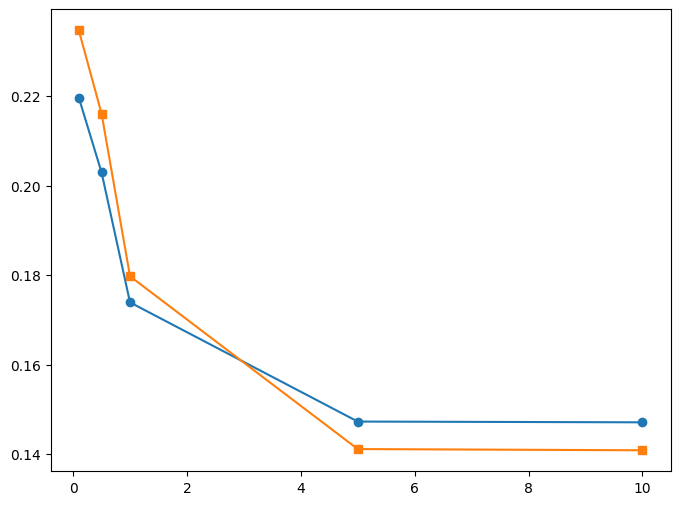

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sigmas, train_errors, marker='o', label="Training Error")
plt.plot(sigmas, test_errors, marker='s', label="Testing Error")

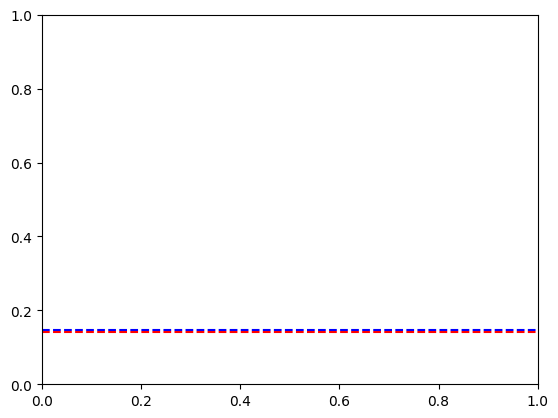

In [ ]:
plt.axhline(y=train_mse, color='blue', linestyle='--', label="Train Error (Part c)")

plt.axhline(y=test_mse, color='red', linestyle='--', label="Test Error (Part c)")  # Constant horizontal lines for part (c) errors



/tmp/ipython-input-554590199.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


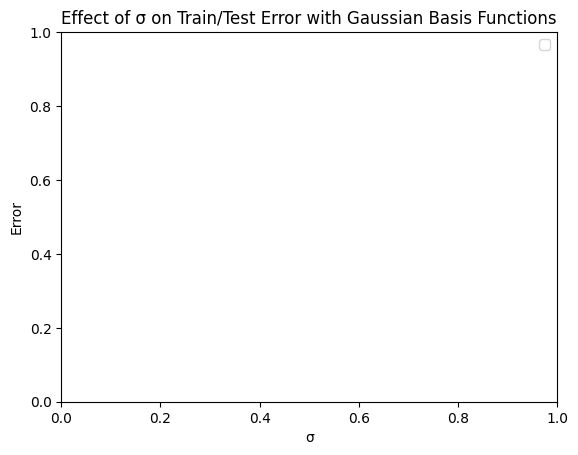

In [ ]:
plt.xlabel("σ")
plt.ylabel("Error")
plt.legend()
plt.title("Effect of σ on Train/Test Error with Gaussian Basis Functions")
plt.show()

(g) Add in all the basis function and perform regularized regression with the regularization

parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy

error for the training data and the testing data, as a function of λ (you should use a log scale

for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different

graph the L2 norm of the weights for the set of basis functions corresponding to each value

of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.


In [ ]:

lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
sigmas = [0.1, 0.5, 1, 5, 10]

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
train_errors = []
test_errors = []
weight_norms = []
weight_norms_sigma = {sigma: [] for sigma in sigmas}

In [ ]:

def gaussian_basis_transform(x, centers, sigma):
    x = x[:, 0]
    return np.exp(- (x[:, None] - centers[None, :])**2 / (2 * sigma**2))



centers = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 10)



weight_norms_sigma = {sigma: [] for sigma in sigmas}
Phi_train_sigma_blocks = {}


for sigma in sigmas:
    Phi_train_sigma_blocks[sigma] = gaussian_basis_transform(x_train, centers, sigma)


for lam in lambdas:

    Phi_train = gaussian_basis_transform(x_train, centers, sigma)
    Phi_test  = gaussian_basis_transform(x_test, centers, sigma)

    model = Ridge(alpha=lam, fit_intercept=False)
    model.fit(Phi_train, y_train)

    y_pred_train = np.clip(y_pred_train, 1e-12, 1-1e-12)
    y_pred_test  = np.clip(y_pred_test, 1e-12, 1-1e-12)

    ce_train = -np.mean(y_train*np.log(y_pred_train) + (1-y_train)*np.log(1-y_pred_train))
    ce_test  = -np.mean(y_test*np.log(y_pred_test) + (1-y_test)*np.log(1-y_pred_test))

    train_errors.append(ce_train)
    test_errors.append(ce_test)


    w = model.coef_
    weight_norms.append(np.linalg.norm(w))


    start = 0
    for sigma in sigmas:
        block_size = Phi_train_sigma_blocks[sigma].shape[1]
        w_block = w[start:start+block_size]
        weight_norms_sigma[sigma].append(np.linalg.norm(w_block))
        start += block_size




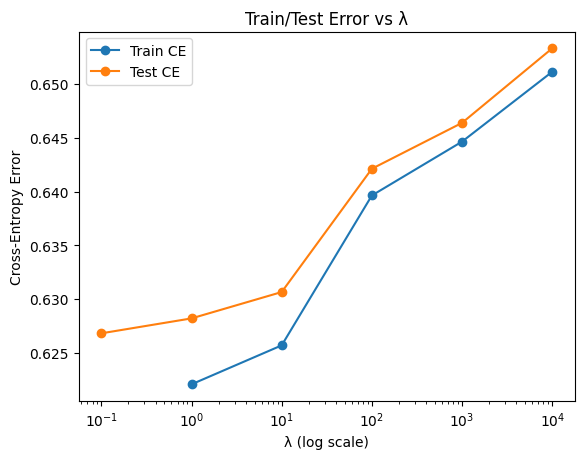

In [ ]:
plt.figure()


min_len = min(len(lambdas), len(train_errors), len(test_errors))

plt.plot(lambdas[:min_len], train_errors[:min_len], marker='o', label="Train CE")
plt.plot(lambdas[:min_len], test_errors[:min_len], marker='o', label="Test CE")

plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Error")
plt.legend()
plt.title("Train/Test Error vs λ")
plt.show()


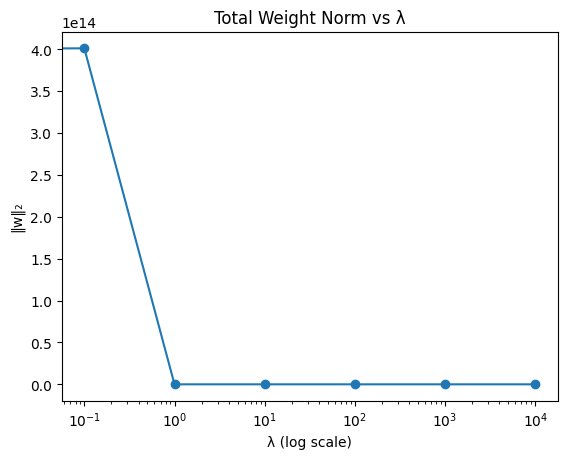

In [ ]:
plt.figure()


min_len = min(len(lambdas), len(weight_norms))

plt.plot(lambdas[:min_len], weight_norms[:min_len], marker='o')

plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("‖w‖₂")
plt.title("Total Weight Norm vs λ")
plt.show()


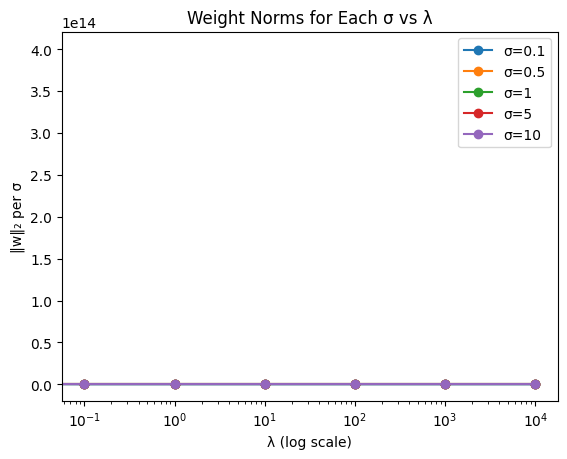

In [ ]:
plt.figure()
for sigma in sigmas:
    plt.plot(lambdas, weight_norms_sigma[sigma], marker='o', label=f"σ={sigma}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("‖w‖₂ per σ")
plt.legend()
plt.title("Weight Norms for Each σ vs λ")
plt.show()

h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on .....the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own). now we will go for h

#Gaussian Basis Functions

If we want to design a set of Gaussian basis functions, we replace the raw input features
𝑥
x with nonlinear transformations of the form:
ϕj​(x)=exp(−2σ2(x−μj​)2​),j=1,2,…,M

Design Choices:

Number of basis functions (M):

Few Gaussians → smoother approximation.

Many Gaussians → more flexibility to capture complex patterns.

Placement of centers:

Could be evenly spaced across the input range.

Or chosen via clustering (e.g., K-means on the input data).

Width σ:

Large σ → wide bumps, more overlap, smoother function.

Small σ → narrow bumps, sharper local fitting


Impact on Bias–Variance Trade-off:

Large σ, small M:

Model is smoother → high bias, low variance.

Might underfit because it cannot capture local details.

Small 𝜎, large 𝑀


Model can fit very localized variations → low bias, high variance.

Risk of overfitting, especially with noisy data.

Balanced choice:

Need enough Gaussians with appropriate width to capture meaningful patterns without memorizing noise.

Often tuned using cross-validation or regularization.

(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would like to adapt the placement of these functions. Derive a learning algorithm that computes both the placement of the basis function, μi and the weight vector w from data (assuming that the width σ isfixed. You should still allow for L2 regularization of the weight vector. Note that your algorithm will need to be iterative.




	​



In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.special import expit

def rbf_design_matrix(X, centers, sigma):
    """
    X: (N, d)
    centers: (K, d)
    sigma: scalar
    Returns Phi: (N, K+1) with bias column
    """
    N = X.shape[0]
    K = centers.shape[0]
    Phi = np.ones((N, K+1))
    for k in range(K):
        diff = X - centers[k]
        Phi[:, k+1] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))
    return Phi

def train_rbf_logistic(X, y, K=10, sigma=1.0, lam=1e-2,
                       eta_w=0.01, eta_mu=0.01, T=50, n_w_steps=5, seed=42):
    """
    Logistic regression with adaptive RBF centers.
    """
    np.random.seed(seed)
    N, d = X.shape


    kmeans = KMeans(n_clusters=K, n_init=5, random_state=seed)
    centers = kmeans.fit(X).cluster_centers_


    w = np.zeros(K+1)

    losses = []

    for t in range(T):

        Phi = rbf_design_matrix(X, centers, sigma)


        for _ in range(n_w_steps):
            z = Phi @ w
            p = expit(z)
            grad_w = Phi.T @ (p - y) + lam * w
            w -= eta_w * grad_w / N


        p = expit(Phi @ w)
        residual = (p - y)
        for k in range(K):
            phi_k = Phi[:, k+1]
            weighted = (residual * w[k+1] * phi_k)[:, None] * (X - centers[k])
            gk = weighted.sum(axis=0) / (sigma**2)
            centers[k] -= eta_mu * gk / N

        loss = -np.mean(y*np.log(p+1e-12) + (1-y)*np.log(1-p+1e-12)) + 0.5*lam*np.sum(w**2)
        losses.append(loss)

    return w, centers, losses




In [ ]:

X = np.random.randn(200, 2)
y = (X[:,0] + X[:,1] > 0).astype(int)

w, centers, losses = train_rbf_logistic(X, y, K=5, sigma=0.5, T=100)

print("Final weights:", w)
print("Final centers:", centers)
print("Final loss:", losses[-1])


Final weights: [-0.14104916  0.18339256  0.12098812 -0.14306334  0.1120901  -0.28694214]
Final centers: [[ 0.05714204  1.67251058]
 [ 1.02957839 -0.78083918]
 [-0.89532278 -1.51357355]
 [ 0.12940615  0.17278399]
 [-1.12126956  0.0745928 ]]
Final loss: 0.6566374494068081


j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?

The alternating algorithm typically converges to a stationary point (i.e., a solution where gradients are near zero), but it is not guaranteed to find the global optimum. In practice it usually finds a locally optimal solution (or saddle point), not the global optimum, because the problem is nonconvex in the centers
𝜇
μ.

Practical consequences & recommendations:

Multiple restarts: Run the algorithm from several different initializations (different k-means seeds or random centers). If solutions differ, you’ve found different local optima — pick the best by validation error.

Diagnostics:

Plot training loss vs iteration — it should decrease monotonically (or near-monotonic).

Monitor ||Δw|| and ||Δμ|| each iteration; stop when both are small.

Evaluate validation loss/accuracy to choose the best run.

Hyperparameters matter: Learning rates (η₍w₎, η₍μ₎), number of centers K, σ, regularization λ, steps per sub-update — all affect convergence quality and speed. Use small η₍μ₎ to avoid jumping out of good basins.

Regularization & stability: Adding small regularization on centers (or clipping centers to data range) and early stopping reduces overfitting and can make convergence behavior more stable.

Stronger optimization methods: Instead of simple gradient steps for μ, you can use quasi-Newton (L-BFGS) on μ, Adam, or second-order updates (if computationally feasible) to find better stationary points.

If you need global guarantees: For convex objectives (e.g., fixed-design linear models or squared loss w.r.t. w with fixed μ) you can get global optima. But joint learning of μ and w is fundamentally nonconvex, so global-optimal guarantees are not available in general.

2. Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and logistic regression (CLASSIFICATION) along with complete data preprocessing steps.

In [ ]:
#Regression
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [ ]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"\n{name}")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))


Linear Regression
MSE: 0.14139480539639646
R² Score: 0.379014962077604

Ridge Regression
MSE: 0.14144787419068447
R² Score: 0.37878189179513455

Lasso Regression
MSE: 0.1701538979961405
R² Score: 0.25270928798583914

ElasticNet
MSE: 0.1504902354877944
R² Score: 0.33906918058730884


In [ ]:
#Classification
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("\nLogistic Regression Classification Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Classification Results:
Accuracy: 0.7727272727272727
Confusion Matrix:
 [[90 10]
 [25 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

